In [27]:
import pandas as pd
df = pd.read_csv('EastWestAirlines.csv')
df  

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [28]:
# 1. Data Preprocessing:

# Preprocessing
df.fillna(df.mean(), inplace=True)

# Remove outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df[['Balance', 'Bonus_miles',]])) 
df = df[(z_scores < 3).all(axis=1)]  

# Standardization
X_cont = df[['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles',
               'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll', 'Award?']]
               
from sklearn.preprocessing import StandardScaler 
SS = StandardScaler()
X_cont_SS = SS.fit_transform(X_cont)
X_cont_SS = pd.DataFrame(X_cont_SS)
X_cont_SS.columns = list(X_cont)
X_cont_SS.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.544214,-0.179043,-0.751959,-0.097556,-0.043684,-0.791326,-1.098333,-0.314129,-0.347928,1.435945,-0.741404
1,-0.683817,-0.179043,-0.751959,-0.097556,-0.043684,-0.789134,-0.990769,-0.314129,-0.347928,1.420330,-0.741404
2,-0.336965,-0.179043,-0.751959,-0.097556,-0.043684,-0.580261,-0.775641,-0.314129,-0.347928,1.452536,-0.741404
3,-0.753909,-0.179043,-0.751959,-0.097556,-0.043684,-0.773902,-1.098333,-0.314129,-0.347928,1.412523,-0.741404
4,0.547781,-0.179043,1.506837,-0.097556,-0.043684,1.513662,1.590770,1.220989,0.759941,1.404228,1.348793


In [29]:
# Exploratory Data Analysis (EDA)

# Summary statistics
print(df.describe()) 

               ID#        Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3868.000000    3868.000000   3868.000000  3868.000000  3868.000000   
mean   2047.137539   62833.797311    136.423733     1.998707     1.014478   
std    1155.877890   63753.058169    762.057538     1.328313     0.148424   
min       1.000000       0.000000      0.000000     1.000000     1.000000   
25%    1052.750000   18065.750000      0.000000     1.000000     1.000000   
50%    2063.500000   40945.500000      0.000000     1.000000     1.000000   
75%    3049.250000   86180.750000      0.000000     3.000000     1.000000   
max    4021.000000  374613.000000  11148.000000     5.000000     3.000000   

         cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3868.000000   3868.000000  3868.000000        3868.000000   
mean      1.004912  14979.592296    11.210962         425.012927   
std       0.112460  18712.277221     9.297984        1353.165471   
min       1.000000      0.000000  

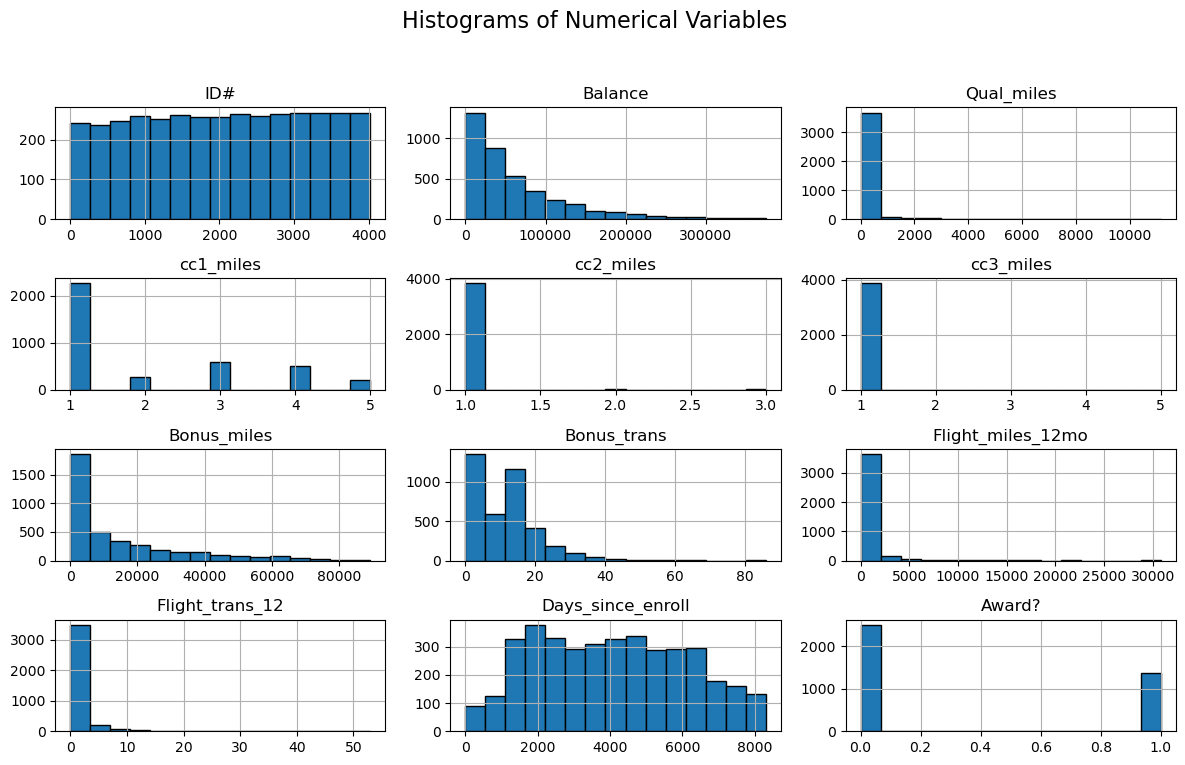

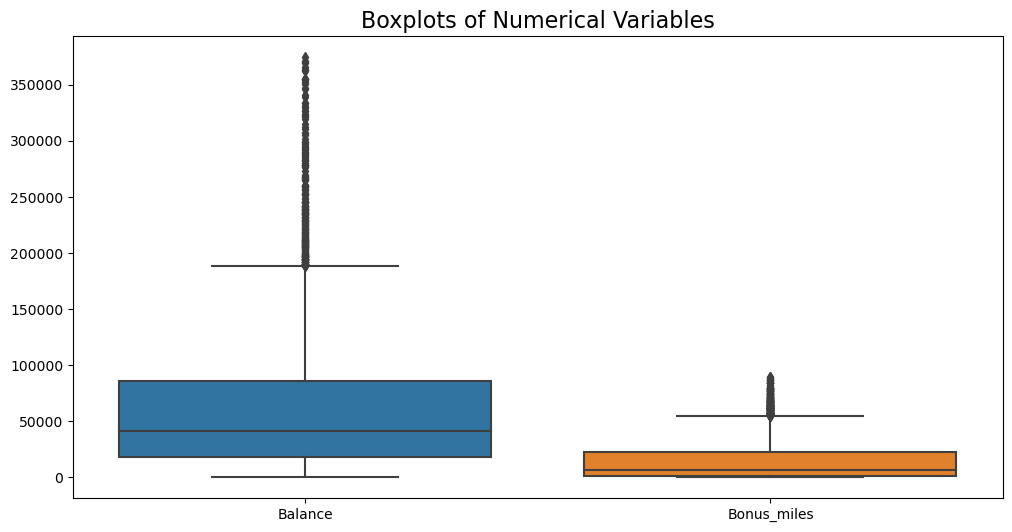

C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwarg

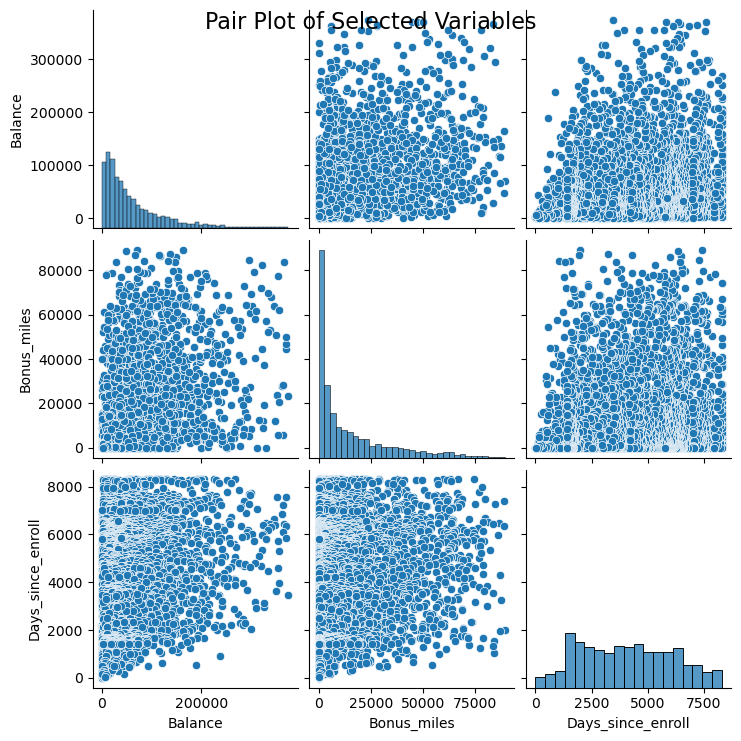

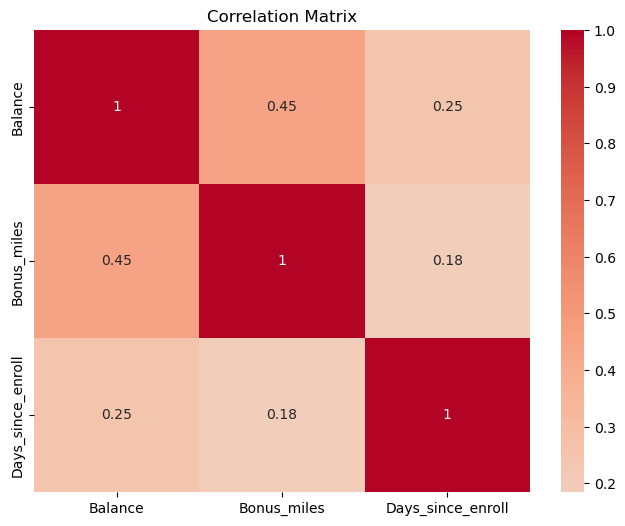

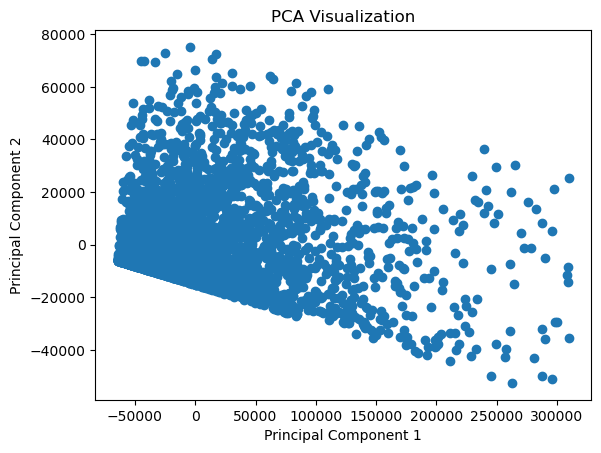

In [30]:
# Visualizations:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histograms
df.hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Balance', 'Bonus_miles']]) 
plt.title('Boxplots of Numerical Variables', fontsize=16)
plt.show()

# Pair plots
sns.pairplot(df[['Balance', 'Bonus_miles', 'Days_since_enroll']]) 
plt.suptitle('Pair Plot of Selected Variables', fontsize=16)
plt.show() 

# Correlation matrix heatmap 
correlation_matrix = df[['Balance', 'Bonus_miles', 'Days_since_enroll']].corr() 
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# PCA (for dimensionality reduction and visualization)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_cont)
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show() 

In [31]:
# 2. Implementing Clustering Algorithms:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# K-Means Clustering
kmeans = KMeans(n_clusters=5, n_init=30)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(X_cont_SS)
df['KMeans_Cluster'] = kmeans_labels

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=5)  # Adjust n_clusters as needed
hierarchical_labels = hierarchical.fit_predict(X_cont_SS)
df['Hierarchical_Cluster'] = hierarchical_labels

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_cont_SS)
df['DBSCAN_Cluster'] = dbscan_labels

print(df['KMeans_Cluster'].value_counts())

print(df['Hierarchical_Cluster'].value_counts())

print(df['DBSCAN_Cluster'].value_counts())

C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_29856\1772828966.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['KMeans_Cluster'] = kmeans_labels
C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_29856\1772828966.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hierarchical_Cluster'] = hierarchical_labels


KMeans_Cluster
0    2401
2    1276
1     144
4      41
3       6
Name: count, dtype: int64
Hierarchical_Cluster
1    2102
2    1399
0     317
3      41
4       9
Name: count, dtype: int64
DBSCAN_Cluster
-1     1547
 0     1391
 1      226
 6      215
 4      136
 9      107
 3       61
 13      51
 2       26
 18      23
 10      15
 20       7
 14       6
 7        6
 5        6
 8        5
 11       5
 17       5
 15       5
 16       5
 21       5
 19       5
 22       5
 12       5
Name: count, dtype: int64


C:\Users\Syed Yaseen Ali\AppData\Local\Temp\ipykernel_29856\1772828966.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBSCAN_Cluster'] = dbscan_labels


In [32]:
# Experimenting with different parameter settings for hierarchical clustering

# Linkage Criteria
from sklearn.metrics import silhouette_score

scores = []
for i in range(2,10):
  cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
  Y = hierarchical.fit_predict(X_cont_SS)
  scores.append(silhouette_score(X_cont_SS,Y)) 

silhouettescore = silhouette_score(X_cont_SS,Y)
silhouettescore

print(f"Silhouette Score for linkage 'ward': {silhouettescore}")

Silhouette Score for linkage 'ward': 0.26565360957302625


C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Syed Yaseen Ali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

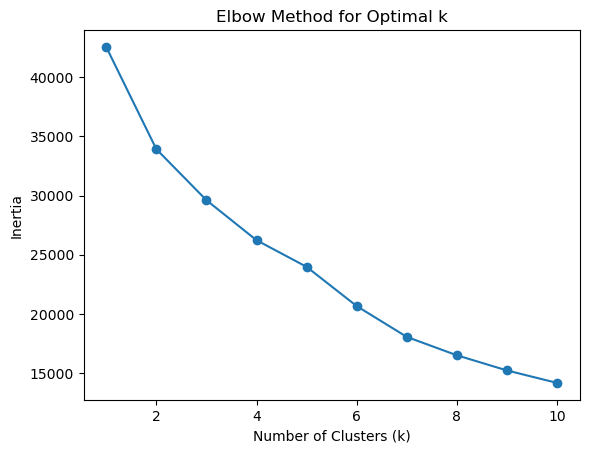

In [33]:
# Experimenting with K-Means

# Elbow method to find optimal number of clusters
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_cont_SS)
  inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [34]:
# Experimenting with DBSCAN

# Try different epsilon and minPts values
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 7, 10]

for eps in eps_values:
  for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(X_cont_SS) 

    # Evaluate clustering results 
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    print(f"DBSCAN with eps={eps}, minPts={min_samples}:")
    print(f"Number of clusters: {n_clusters}")
    print(f"Number of noise points: {n_noise}")

DBSCAN with eps=0.3, minPts=3:
Number of clusters: 81
Number of noise points: 2236
DBSCAN with eps=0.3, minPts=5:
Number of clusters: 20
Number of noise points: 2564
DBSCAN with eps=0.3, minPts=7:
Number of clusters: 10
Number of noise points: 2714
DBSCAN with eps=0.3, minPts=10:
Number of clusters: 4
Number of noise points: 2832
DBSCAN with eps=0.5, minPts=3:
Number of clusters: 56
Number of noise points: 1323
DBSCAN with eps=0.5, minPts=5:
Number of clusters: 23
Number of noise points: 1547
DBSCAN with eps=0.5, minPts=7:
Number of clusters: 12
Number of noise points: 1731
DBSCAN with eps=0.5, minPts=10:
Number of clusters: 9
Number of noise points: 1902
DBSCAN with eps=0.7, minPts=3:
Number of clusters: 34
Number of noise points: 830
DBSCAN with eps=0.7, minPts=5:
Number of clusters: 18
Number of noise points: 985
DBSCAN with eps=0.7, minPts=7:
Number of clusters: 14
Number of noise points: 1114
DBSCAN with eps=0.7, minPts=10:
Number of clusters: 8
Number of noise points: 1281
DBSCAN

In [35]:
# 3. Analyze clusters and interpret characteristics:

# K-Means
# Example:
for cluster in range(3):
  cluster_data = df[df['KMeans_Cluster'] == cluster]
  print(f"K-Means Cluster {cluster}:")
  print(cluster_data[['Balance', 'Bonus_miles', 'Days_since_enroll']].describe())

K-Means Cluster 0:
             Balance   Bonus_miles  Days_since_enroll
count    2401.000000   2401.000000        2401.000000
mean    39625.875469   4048.994586        3676.701374
std     41684.946272   5295.656314        2041.477469
min         0.000000      0.000000           2.000000
25%     12264.000000    250.000000        1926.000000
50%     26055.000000   2125.000000        3508.000000
75%     51088.000000   5647.000000        5192.000000
max    330644.000000  40256.000000        8296.000000
K-Means Cluster 1:
             Balance   Bonus_miles  Days_since_enroll
count     144.000000    144.000000         144.000000
mean   122388.770833  24501.187500        4379.444444
std     92562.926453  22233.910423        1986.463649
min       231.000000   1800.000000         890.000000
25%     50702.000000   7685.000000        2463.750000
50%    109272.000000  15120.500000        4483.000000
75%    183602.750000  34911.000000        6033.750000
max    369816.000000  84215.000000        82

In [36]:
# DBSCAN
# Note that DBSCAN can identify noise points (labeled as -1)
for cluster in set(dbscan_labels):
  if cluster != -1:
    cluster_data = df[df['DBSCAN_Cluster'] == cluster]
    print(f"DBSCAN Cluster {cluster}:")
    print(cluster_data[['Balance', 'Bonus_miles', 'Days_since_enroll']].describe())

DBSCAN Cluster 0:
             Balance   Bonus_miles  Days_since_enroll
count    1391.000000   1391.000000        1391.000000
mean    25806.882099   1799.408339        3453.350108
std     22364.856410   2786.917264        2076.034562
min        50.000000      0.000000           8.000000
25%      9780.500000      0.000000        1673.500000
50%     19661.000000    710.000000        3217.000000
75%     35157.500000   2560.000000        5050.500000
max    140914.000000  19969.000000        8296.000000
DBSCAN Cluster 1:
             Balance   Bonus_miles  Days_since_enroll
count     226.000000    226.000000         226.000000
mean    24936.646018   3026.362832        4042.495575
std     21073.536533   3129.092447        1908.149846
min       249.000000      0.000000         858.000000
25%      9390.750000    500.000000        2438.750000
50%     19406.000000   2297.000000        3777.000000
75%     35712.000000   4419.500000        5541.750000
max    104523.000000  15147.000000        8296

In [37]:
# Interpret clusters considering noise points and potential outliers.

# Insights:
# - K-Means identified a cluster of high-value customers with high balances and bonus miles.
# - Hierarchical clustering revealed a cluster of recent enrollees with low activity.
# - DBSCAN detected a few outlier customers with extremely high balances and bonus miles.

# Further analysis could involve:
# - Visualizing clusters using PCA or other dimensionality reduction techniques.
# - Profiling clusters based on demographics or other relevant features.
# - Developing targeted marketing strategies based on cluster characteristics.  

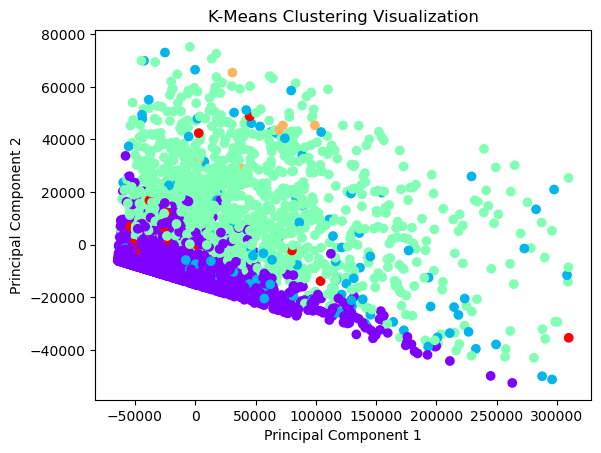

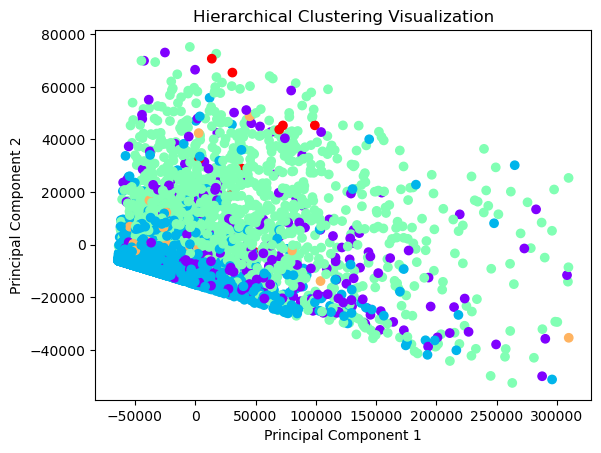

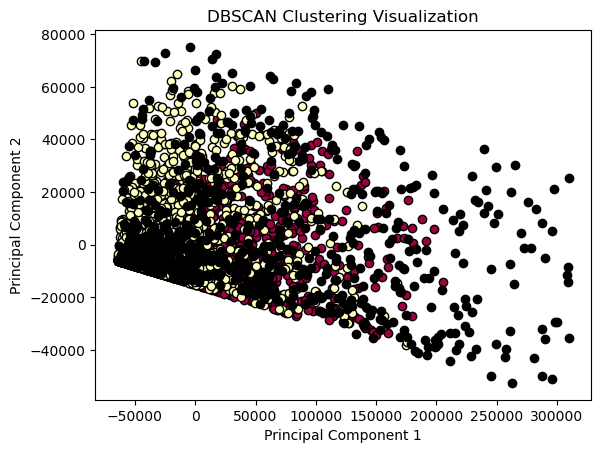

In [38]:
# 4. Visualization:
import matplotlib.pyplot as plt
import numpy as np

# K-Means Visualization
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Hierarchical Clustering Visualization
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=hierarchical_labels, cmap='rainbow')
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# DBSCAN Visualization
unique_labels = set(dbscan_labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan_labels == k)

    xy = pca_result[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('DBSCAN Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [39]:
# 5. Evaluation and Performance Metrics:
# Calculate Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(X_cont_SS, kmeans_labels)
print("Silhouette Score for K-Means:", kmeans_silhouette)

# Calculate Silhouette Score for DBSCAN 
dl_no_noise = dbscan_labels[dbscan_labels != -1] 
sf_no_noise = X_cont_SS[dbscan_labels != -1]
if len(set(dl_no_noise)) > 1: 
  dbscan_silhouette = silhouette_score(sf_no_noise, dl_no_noise)
  print("Silhouette Score for DBSCAN (excluding noise):", dbscan_silhouette)
else: 
  print("Cannot calculate Silhouette Score for DBSCAN: Less than two clusters (excluding noise)")

Silhouette Score for K-Means: 0.32490491449970577
Silhouette Score for DBSCAN (excluding noise): 0.3016506298150967
